# Homework 2

Load libraries needed

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

## Paramethers for requests:
    1- ww_x_UNITE_ACAD - Section (Informatique?)  =  249847
    2- ww_x_PERIODE_ACAD - Semester wanted        =  978181
    3- ww_i_reportModel - General parameter =  133685247

In [2]:
unite_academique=249847
periode_academique=[978181, 978187,978195,39486325,123455150,213637754,213637922,213638028,355925344]
report_model=133685247

In [3]:
parameters={'ww_i_reportModel':'133685247','ww_i_reportModelXsl':'133685270','ww_x_UNITE_ACAD':'249847'}

In [4]:
base_all_gps='http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.filter?ww_b_list=1&ww_i_reportmodel=133685247&ww_c_langue=&ww_i_reportModelXsl=133685270&zz_x_UNITE_ACAD=Informatique'

In [5]:
informatique = {'ww_x_UNITE_ACAD': '249847'}
r = requests.get(base_all_gps,params=informatique)

In [6]:
r.text

'<html><head><META http-equiv="Content-Type" content="text/html; charset=iso-8859-1"><div></div><title></title><script type="text/javascript" src="GEDPUBLICREPORTS.txt?ww_x_path=Gestac.Base.Palette_js&amp;ww_c_langue=fr"></script><link rel="stylesheet" type="text/css" href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.Style"><link rel="stylesheet" type="text/css" href="GEDPUBLICREPORTS.css?ww_x_path=Gestac.Moniteur.StyleNavigator"></head><body bgcolor="#ffffff" marginheight="0" marginwidth="5" link="#666666" vlink="#666666" alink="#666666"><div class="filtres"><form method="GET" name="f" action="!GEDPUBLICREPORTS.filter"><input type="hidden" name="ww_b_list" value="1"><input type="hidden" name="ww_i_reportmodel" value="133685247"><input type="hidden" name="ww_c_langue" value=""><h1 id="titre">Liste des étudiants inscrits par semestre</h1><table border="0" id="format"><tr><th>Format:</th></tr><tr><td><input type="radio" name="ww_i_reportModelXsl" value="133685270" checked>html</td></t

The three following lists consider the items we want to consider for our study.

In [7]:
semester_bachelor=['Bachelor semestre 1','Bachelor semestre 2','Bachelor semestre 3','Bachelor semestre 4','Bachelor semestre 5','Bachelor semestre 6']
semester_master=['Master semestre 1','Master semestre 2','Master semestre 3','Projet Master automne','Projet Master printemps']
years=['2007-2008','2008-2009','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017']

We generate a dictionary that will help us to load the dataframe to analyse the data.

In [8]:
# Generate dictionary
main_dictionary={}
for year in years:
    main_dictionary[year]=dict()
    for item in semester_bachelor:
        main_dictionary[year][item]=0
    for item in semester_master:
        main_dictionary[year][item]=0
    

We use beautiful soup to read the html file.

In [9]:
soup=BeautifulSoup(r.text, "lxml")

In [10]:
# Parse the parameter "periode_academique"
parse_years=soup.find_all('option')

for year in main_dictionary:
    for item in parse_years:
        print(str(item))
        if year==item.string:
            main_dictionary[year]['periode_academique']=item.get('value') #str(item).split("\"")[1]

<option value="null"></option>
<option value="942293">Architecture</option>
<option value="246696">Chimie et génie chimique</option>
<option value="943282">Cours de mathématiques spéciales</option>
<option value="637841336">EME (EPFL Middle East)</option>
<option value="942623">Génie civil</option>
<option value="944263">Génie mécanique</option>
<option value="943936">Génie électrique et électronique </option>
<option value="2054839157">Humanités digitales</option>
<option selected="" value="249847">Informatique</option>
<option value="120623110">Ingénierie financière</option>
<option value="946882">Management de la technologie</option>
<option value="944590">Mathématiques</option>
<option value="945244">Microtechnique</option>
<option value="945571">Physique</option>
<option value="944917">Science et génie des matériaux</option>
<option value="942953">Sciences et ingénierie de l'environnement</option>
<option value="945901">Sciences et technologies du vivant</option>
<option value="15

In [11]:
main_dictionary

{'2007-2008': {'Bachelor semestre 1': 0,
  'Bachelor semestre 2': 0,
  'Bachelor semestre 3': 0,
  'Bachelor semestre 4': 0,
  'Bachelor semestre 5': 0,
  'Bachelor semestre 6': 0,
  'Master semestre 1': 0,
  'Master semestre 2': 0,
  'Master semestre 3': 0,
  'Projet Master automne': 0,
  'Projet Master printemps': 0,
  'periode_academique': '978181'},
 '2008-2009': {'Bachelor semestre 1': 0,
  'Bachelor semestre 2': 0,
  'Bachelor semestre 3': 0,
  'Bachelor semestre 4': 0,
  'Bachelor semestre 5': 0,
  'Bachelor semestre 6': 0,
  'Master semestre 1': 0,
  'Master semestre 2': 0,
  'Master semestre 3': 0,
  'Projet Master automne': 0,
  'Projet Master printemps': 0,
  'periode_academique': '978187'},
 '2009-2010': {'Bachelor semestre 1': 0,
  'Bachelor semestre 2': 0,
  'Bachelor semestre 3': 0,
  'Bachelor semestre 4': 0,
  'Bachelor semestre 5': 0,
  'Bachelor semestre 6': 0,
  'Master semestre 1': 0,
  'Master semestre 2': 0,
  'Master semestre 3': 0,
  'Projet Master automne': 0,

In [12]:
tag=soup.body

gps_list=tag.find_all('a')

In [13]:
# Process the GPS list
# Remove the ones without "Informatique", "Master" or "Bachelor"
# Hard preprocessing to fast eliminate the unwanted strings
gps_processed=[]
key1='Informatique'
key2='Bachelor'
key3='Master'
for i in gps_list:
    if key1 in i.contents[0] and (key2 in i.contents[0] or key3 in i.contents[0]):
        gps_processed.append(i)


In [14]:
# Keep only the right ones - get the GPS in the main_dictionary
for year in main_dictionary:
    for semester in main_dictionary[year]:
        for item in gps_processed:
            if 'Informatique, '+year+', '+semester==item.contents[0]:
                gps=str(item).split("'")[1].split("=")[1]
                main_dictionary[year][semester]=gps
print(main_dictionary)

{'2011-2012': {'Bachelor semestre 5': '213617999', 'Master semestre 2': '736292183', 'Bachelor semestre 4': '357704559', 'Master semestre 3': '357707104', 'Projet Master automne': '357707070', 'periode_academique': '123455150', 'Bachelor semestre 3': '357704537', 'Master semestre 1': '736292150', 'Projet Master printemps': '357707133', 'Bachelor semestre 1': '736308968', 'Bachelor semestre 2': '736308992', 'Bachelor semestre 6': '213618020'}, '2010-2011': {'Bachelor semestre 5': '109577010', 'Master semestre 2': '357707041', 'Bachelor semestre 4': '213617981', 'Master semestre 3': '213629934', 'Projet Master automne': '213629894', 'periode_academique': '39486325', 'Bachelor semestre 3': '213617963', 'Master semestre 1': '357707009', 'Projet Master printemps': '213629966', 'Bachelor semestre 1': '357704486', 'Bachelor semestre 2': '357704513', 'Bachelor semestre 6': '109577031'}, '2016-2017': {'Bachelor semestre 5': '1744378003', 'Master semestre 2': '2021044095', 'Bachelor semestre 4':

# Get the tables

In [15]:
base_request='http://isa.epfl.ch/imoniteur_ISAP/!GEDPUBLICREPORTS.html'

In [16]:
parameters={'ww_i_reportModel':'133685247','ww_i_reportModelXsl':'133685270'
            ,'ww_x_UNITE_ACAD':'249847','ww_x_PERIODE_ACAD':0,'ww_x_GPS':0}

In [17]:
bachelor_data={x:dict() for x in main_dictionary}
master_data={x:dict() for x in main_dictionary}
for year in main_dictionary:
    parameters['ww_x_PERIODE_ACAD']=main_dictionary[year]['periode_academique']
    for semester in main_dictionary[year]:
        if semester=='periode_academique':
            continue
        parameters['ww_x_GPS']=main_dictionary[year][semester]
        
        # Post the request
        req = requests.get(base_request,params=parameters)
        
        # Get the html file with BeautifulSoap (maybe not needed)
        #html_table=BeautifulSoup(req.text, "lxml")
        
        # Import and process the dataframe with pandas
        try:
            df=pd.read_html(str(req.text),skiprows=1,header=0)[0]
            df.columns=['Sex','Name','OrienB','OrienM','Specialization','Unuseful1','Mineur','State','Exchange','ExchangeSchool','Sciper','Unuseful2']
            del df['OrienB'],df['OrienM'],df['Unuseful1'],df['State'],df['Exchange'],df['ExchangeSchool'],df['Unuseful2']
            df['Year']=year
        except:
            df=pd.DataFrame({'Sex':[],'Name':[],'Specialization':[],'Mineur':[],'Sciper':[],'Year':[]})
        
        # Type semester can be 'Bachelor' or 'Master'. 
        type_semester=semester.split(' ')[0]
        if type_semester=='Projet':
            type_semester='Master'
            
        # Semester number is the number of the semester. It is 4 for master projects.
        semester_number=-1
        if semester!='Projet Master automne' and semester!='Projet Master printemps':
            semester_number=int(semester.split(' ')[2])
        else:
            semester_number=4
        df['Semester']=semester_number
        df=df.set_index(['Sciper','Year','Semester'])

        if type_semester=="Bachelor":
            bachelor_data[year][semester_number]=df
        elif type_semester=="Master":
            master_data[year][semester_number]=df
        else:
            print(type_semester)
            raise("Error parsing file: type semester not acceptable")
    print("Year "+year+" parsed")

Year 2011-2012 parsed
Year 2010-2011 parsed
Year 2016-2017 parsed
Year 2007-2008 parsed
Year 2008-2009 parsed
Year 2013-2014 parsed
Year 2009-2010 parsed
Year 2012-2013 parsed
Year 2014-2015 parsed
Year 2015-2016 parsed


In [18]:
# Check of correct parsing of all the semesters
bachelor_data_semesters=0
master_data_semesters=0
for year in master_data:
    master_data_semesters+=len(master_data[year])
for year in bachelor_data:
    bachelor_data_semesters+=len(bachelor_data[year])
if (bachelor_data_semesters+master_data_semesters!=100):
    raise("Some semester has not been correctly parsed")

# Bachelor analysis

In [19]:
bachelor_tables=[]
for year in bachelor_data:
    for semester in bachelor_data[year]:
        bachelor_tables.append(bachelor_data[year][semester])
total_bachelor=pd.concat(bachelor_tables,axis=0,join='outer')
total_bachelor=total_bachelor.reset_index()
groups_bachelor=total_bachelor.groupby('Sciper')

In [20]:
final_df_bachelor=pd.DataFrame({'Sciper':[],'Name':[],'Sex':[],'Semesters':[]})

for student,group in groups_bachelor:
    first_year=group['Semester'].isin([1]).sum()
    last_year=group['Semester'].isin([6]).sum()
    year=int(group['Year'].min()[:4])
    
    if first_year and last_year:
        number_of_years=group.shape[0]
        name=group['Name'].iloc[0]
        sex=group['Sex'].iloc[0]
        if sex=="Monsieur":
            sex='M'
        elif sex=="Madame":
            sex='F'
        else:
            raise("Not existing sex")
        ser=pd.DataFrame({'Sciper':[student],'Name':[name],'Sex':[sex],'Semesters':[number_of_years],'Year':[year]})
        final_df_bachelor=final_df_bachelor.append(ser)
    
final_df_bachelor=final_df_bachelor.set_index('Sciper')
final_df_bachelor.head()

,Name,Semesters,Sex,Year
Sciper,,,,
147008.0,Good Xavier,6.0,M,2008.0
169569.0,Arévalo Christian,6.0,M,2007.0
169731.0,Knecht Mathieu,8.0,M,2007.0
169795.0,Scheiben Pascal,9.0,M,2007.0
171195.0,Richter Arnaud,6.0,M,2007.0


In [21]:
final_df_bachelor_grouped = final_df_bachelor[['Year','Sex','Semesters']].groupby(['Year','Sex'])
final_df_bachelor_grouped.describe()

Semesters
Year   Sex                 
2007.0 F   count   2.000000
           mean    6.000000
           std     0.000000
           min     6.000000
           25%     6.000000
           50%     6.000000
           75%     6.000000
           max     6.000000
       M   count  39.000000
           mean    6.974359
           std     1.366655
           min     6.000000
           25%     6.000000
           50%     6.000000
           75%     8.000000
           max    12.000000
2008.0 F   count   5.000000
           mean    6.600000
           std     1.341641
           min     6.000000
           25%     6.000000
           50%     6.000000
           75%     6.000000
           max     9.000000
       M   count  38.000000
           mean    7.210526
           std     1.679091
           min     6.000000
           25%     6.000000
           50%     6.000000
...                     ...
2013.0 F   std     0.816497
           min     6.000000
           25%     6.000000
           50%     6.000000
           75%     6.000000
           max     8.000000
       M   count  41.000000
           mean    6.219512
           std     0.419058
           min     6.000000
           25%     6.000000
           50%     6.000000
           75%     6.000000
           max     7.000000
2014.0 F   count   1.000000
           mean    6.000000
           std          NaN
           min     6.000000
           25%     6.000000
           50%     6.000000
           75%     6.000000
           max     6.000000
       M   count  20.000000
           mean    6.000000
           std     0.000000
           min     6.000000
           25%     6.000000
           50%     6.000000
           75%     6.000000
           max     6.000000

[128 rows x 1 columns]

In [22]:
df_bachelor_mean = final_df_bachelor_grouped.mean()
df_bachelor_mean

Semesters
Year   Sex           
2007.0 F     6.000000
       M     6.974359
2008.0 F     6.600000
       M     7.210526
2009.0 F     7.000000
       M     7.813953
2010.0 F     6.000000
       M     7.290909
2011.0 F     7.250000
       M     7.553571
2012.0 F     8.000000
       M     7.026316
2013.0 F     6.333333
       M     6.219512
2014.0 F     6.000000
       M     6.000000

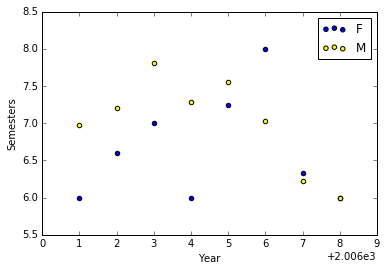

In [23]:
df_bachelor_mean.reset_index(level=0, inplace=True)
ax = df_bachelor_mean.loc['F'].plot(x='Year', y='Semesters', color='Blue', label='F', kind='scatter')
df_bachelor_mean.loc['M'].plot.scatter(x='Year', y='Semesters', color='Yellow', label='M', ax=ax)

# Master analysis - TODO

In [ ]:
master_tables=[]
for year in master_data:
    for semester in master_data[year]:
        master_tables.append(master_data[year][semester])
total_master=pd.concat(master_tables,axis=0,join='outer')
total_master=total_master.reset_index()
groups_master=total_master.groupby('Sciper')

In [ ]:
final_df_master=pd.DataFrame({'Sciper':[],'Name':[],'Sex':[],'Semesters':[],'Specialization':[]})

for student,group in groups_master:
    # Store the check variables
    first_semester=group['Semester'].isin([1]).sum()
    second_semester=group['Semester'].isin([2]).sum()
    third_semester=group['Semester'].isin([3]).sum()
    master_project_done=group['Semester'].isin([4]).sum()
    mineur=group['Mineur'].fillna('').sum()!=''
    specialization=group.Specialization.fillna(method='backfill').fillna(method='pad').fillna('').iloc[0]    
    year=group['Year'].min()

    # Store only the students with:
    #   - first_semester and master_project_done
    #   - first_semester and third_semester 
    #   - first_semester and second_semester and not mineur
    check1=first_semester and master_project_done
    check2=first_semester and third_semester
    check3=first_semester and second_semester and not mineur
    
    
    
    if check1 or check2 or check3:
        number_of_years=group.shape[0]
        name=group['Name'].iloc[0]
        sex=group['Sex'].iloc[0]
        if sex=="Monsieur":
            sex='M'
        elif sex=="Madame":
            sex='F'
        else:
            raise("Not existing sex")
        ser=pd.DataFrame({'Sciper':[student],'Name':[name],'Sex':[sex],'Semesters':[number_of_years],
                         'Specialization':[specialization],'Year':[year]})
        final_df_master=final_df_master.append(ser)
    
final_df_master=final_df_master.set_index('Sciper')
final_df_master.head()

In [ ]:
final_df_master[['Sex','Semesters']].groupby('Sex').describe()

In [ ]:
specialization_analysis=final_df_master[['Semesters','Specialization']].groupby('Specialization')
specialization_analysis.count()

In [ ]:
from scipy.stats import t

specialization_mean=specialization_analysis.mean()
specialization_std=specialization_analysis.std()
specialization_count=specialization_analysis.count()
output=specialization_analysis.mean()
base_mean=specialization_mean.iloc[0]
base_std=specialization_std.iloc[0]
base_count=specialization_count.iloc[0]
nu=specialization_count+base_count-2
#print(nu.shape,specialization_mean.shape,t.cdf(specialization_mean,nu))
output['t-test']=(specialization_mean-base_mean)/(specialization_std*specialization_std/specialization_count+base_std*base_std/base_count)
output['p-value']=prova=t.sf(abs(output['t-test'].reshape([output['t-test'].shape[0],1])),nu)*2
output
